# Mid Semester Presentation

## Data Exploration

In [1]:
using CSV, DataFrames

In [2]:
brca = CSV.read("brca.csv", DataFrame, normalizenames= true);
brca = dropmissing(brca);
first(brca,5)

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage
,String15,Int64,String7,Float64,Float64,Float64,Float64,String3
1,TCGA-D8-A1XD,36,FEMALE,0.080353,0.42638,0.54715,0.27368,III
2,TCGA-EW-A1OX,43,FEMALE,-0.42032,0.57807,0.61447,-0.031505,II
3,TCGA-A8-A079,69,FEMALE,0.21398,1.3114,-0.32747,-0.23426,III
4,TCGA-D8-A1XR,56,FEMALE,0.34509,-0.21147,-0.19304,0.12427,II
5,TCGA-BH-A0BF,56,FEMALE,0.22155,1.9068,0.52045,-0.31199,II


In [3]:
brca = select(brca, Not(:Patient_ID));
brca = insertcols!(brca, 1, :ID => 1:317);

In [4]:
function cat_code1(x)
    if x == "MALE"
        return 1
    else
        return 0
    end
end
brca[!,:Gender] = map(x -> cat_code1(x), brca[!, :Gender]);
# brca[!, :Gender] = cat_code1.(brca[!, :Gender]);
first(brca,5)

,ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology
,Int64,Int64,Int64,Float64,Float64,Float64,Float64,String3,String31
1,1,36,0,0.080353,0.42638,0.54715,0.27368,III,Infiltrating Ductal Carcinoma
2,2,43,0,-0.42032,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma
3,3,69,0,0.21398,1.3114,-0.32747,-0.23426,III,Infiltrating Ductal Carcinoma
4,4,56,0,0.34509,-0.21147,-0.19304,0.12427,II,Infiltrating Ductal Carcinoma
5,5,56,0,0.22155,1.9068,0.52045,-0.31199,II,Infiltrating Ductal Carcinoma


In [5]:
function cat_code2(x)
    if x == "Positive"
        return 1
    else
        return 0
    end
end
brca[!,:ER_status] = map(x -> cat_code2(x), brca[!, :ER_status]);
brca[!,:PR_status] = map(x -> cat_code2(x), brca[!, :PR_status]);
brca[!,:HER2_status] = map(x -> cat_code2(x), brca[!, :HER2_status]);
first(brca,5)

,ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology
,Int64,Int64,Int64,Float64,Float64,Float64,Float64,String3,String31
1,1,36,0,0.080353,0.42638,0.54715,0.27368,III,Infiltrating Ductal Carcinoma
2,2,43,0,-0.42032,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma
3,3,69,0,0.21398,1.3114,-0.32747,-0.23426,III,Infiltrating Ductal Carcinoma
4,4,56,0,0.34509,-0.21147,-0.19304,0.12427,II,Infiltrating Ductal Carcinoma
5,5,56,0,0.22155,1.9068,0.52045,-0.31199,II,Infiltrating Ductal Carcinoma


In [6]:
brca = select(brca, Not(:Date_of_Surgery));
brca = select(brca, Not(:Date_of_Last_Visit	));
brca = select(brca, Not(:Patient_Status));
first(brca,5)

,ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology
,Int64,Int64,Int64,Float64,Float64,Float64,Float64,String3,String31
1,1,36,0,0.080353,0.42638,0.54715,0.27368,III,Infiltrating Ductal Carcinoma
2,2,43,0,-0.42032,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma
3,3,69,0,0.21398,1.3114,-0.32747,-0.23426,III,Infiltrating Ductal Carcinoma
4,4,56,0,0.34509,-0.21147,-0.19304,0.12427,II,Infiltrating Ductal Carcinoma
5,5,56,0,0.22155,1.9068,0.52045,-0.31199,II,Infiltrating Ductal Carcinoma


## Data visualization

In [7]:
using Plots

In [8]:
using StatsPlots

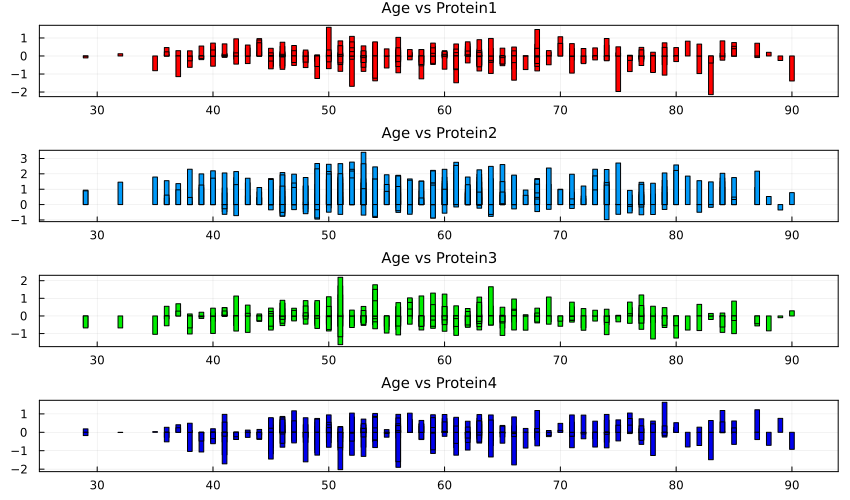

In [9]:
p1 = bar(brca[:,:Age], brca[:,:Protein1], legend = false, bar_width = 0.4, color = :red, framestyle = :box,
    title = "Age vs Protein1", titlefontsize = 10)
p2 = bar(brca[:,:Age], brca[:,:Protein2], legend = false, bar_width = 0.4, framestyle = :box,
    title = "Age vs Protein2", titlefontsize = 10)
p3 = bar(brca[:,:Age], brca[:,:Protein3], legend = false, bar_width = 0.4, color = :green2, framestyle = :box,
    title = "Age vs Protein3", titlefontsize = 10)
p4 = bar(brca[:,:Age], brca[:,:Protein4], legend = false, bar_width = 0.4, color = :blue2, framestyle = :box,
    title = "Age vs Protein4", titlefontsize = 10)
plot!(p1,p2,p3,p4, layout=(4,1), size = (850,500))

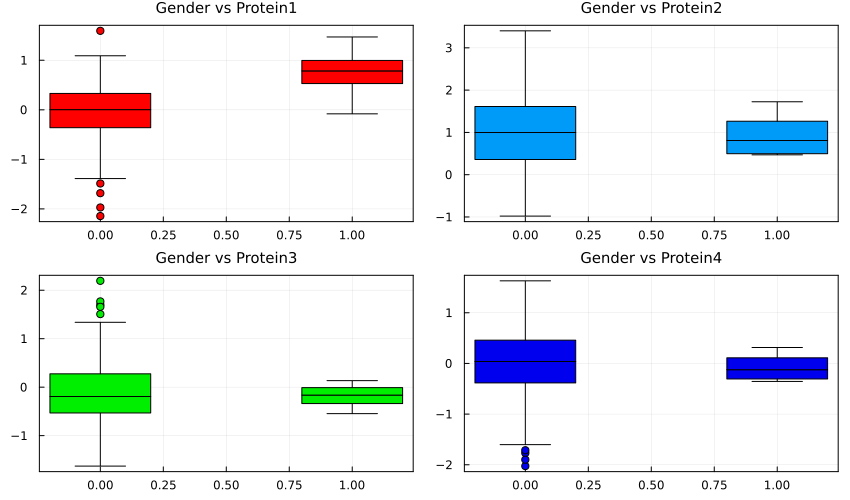

In [10]:
p5 = boxplot(brca[:,:Gender], brca[:,:Protein1], legend = false, bar_width = 0.4, color = :red, framestyle = :box,
    title = "Gender vs Protein1", titlefontsize = 10)
p6 = boxplot(brca[:,:Gender], brca[:,:Protein2], legend = false, bar_width = 0.4, framestyle = :box,
    title = "Gender vs Protein2", titlefontsize = 10)
p7 = boxplot(brca[:,:Gender], brca[:,:Protein3], legend = false, bar_width = 0.4, color = :green2, framestyle = :box,
    title = "Gender vs Protein3", titlefontsize = 10)
p8 = boxplot(brca[:,:Gender], brca[:,:Protein4], legend = false, bar_width = 0.4, color = :blue2, framestyle = :box,
    title = "Gender vs Protein4", titlefontsize = 10)
plot!(p5,p6,p7,p8, layout=(2,2), size = (850,500))

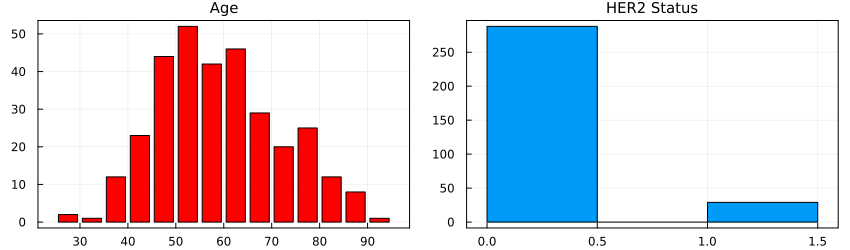

In [11]:
p9 = histogram(brca[:,:Age], legend = false, bar_width = 4, color = :red, framestyle = :box,
    title = "Age", titlefontsize = 10)
p10 = histogram(brca[:,:HER2_status], legend = false, bar_width = 0.5, framestyle = :box,
    title = "HER2 Status", titlefontsize = 10)
plot!(p9, p10, layout=(1,2), size = (850,250))

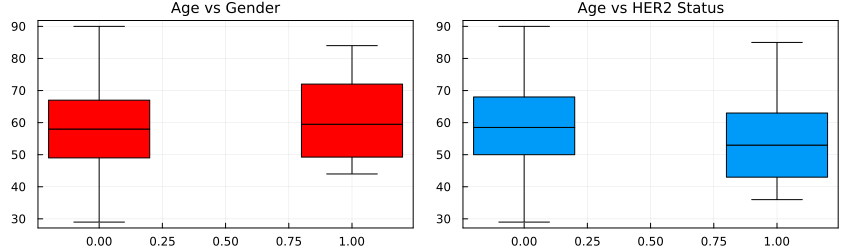

In [12]:
p11 = boxplot(brca[:,:Gender], brca[:,:Age], legend = false, bar_width = 0.4, color = :red, framestyle = :box,
    title = "Age vs Gender", titlefontsize = 10)
p12 = boxplot(brca[:,:HER2_status], brca[:,:Age], legend = false, bar_width = 0.4, framestyle = :box,
    title = "Age vs HER2 Status", titlefontsize = 10)
plot!(p11, p12, layout=(1,2), size = (850,250))

In [13]:
using Distributions

In [14]:
d1 = fit(Normal,brca[:,:Protein1]);
d2 = fit(Normal,brca[:,:Protein2]);
d3 = fit(Normal,brca[:,:Protein3]);
d4 = fit(Normal,brca[:,:Protein4]);

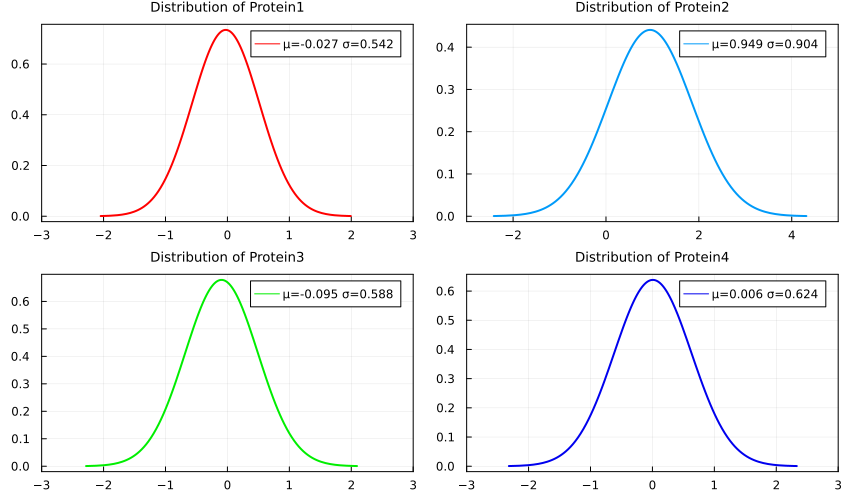

In [15]:
p13 = plot(d1, legend = true, xlim = (-3,3), size = (420,200), title = "Distribution of Protein1", titlefontsize = 9,
    label = "μ=-0.027 σ=0.542", framestyle = :box, color = :red, linewidth = 2)
p14 = plot(d2, legend = true, xlim = (-3,5), size = (420,200), title = "Distribution of Protein2", titlefontsize = 9,
    label = "μ=0.949 σ=0.904", framestyle = :box, linewidth = 2)
p15 = plot(d3, legend = true, xlim = (-3,3), size = (420,200), title = "Distribution of Protein3", titlefontsize = 9,
    label = "μ=-0.095 σ=0.588", framestyle = :box, color= :green2, linewidth = 2)
p16 = plot(d4, legend = true, xlim = (-3,3), size = (420,200), title = "Distribution of Protein4", titlefontsize = 9,
    label = "μ=0.006 σ=0.624", framestyle = :box, color = :blue2, linewidth = 2)
plot!(p13, p14, p15, p16, layout=(2,2), size = (850,500))

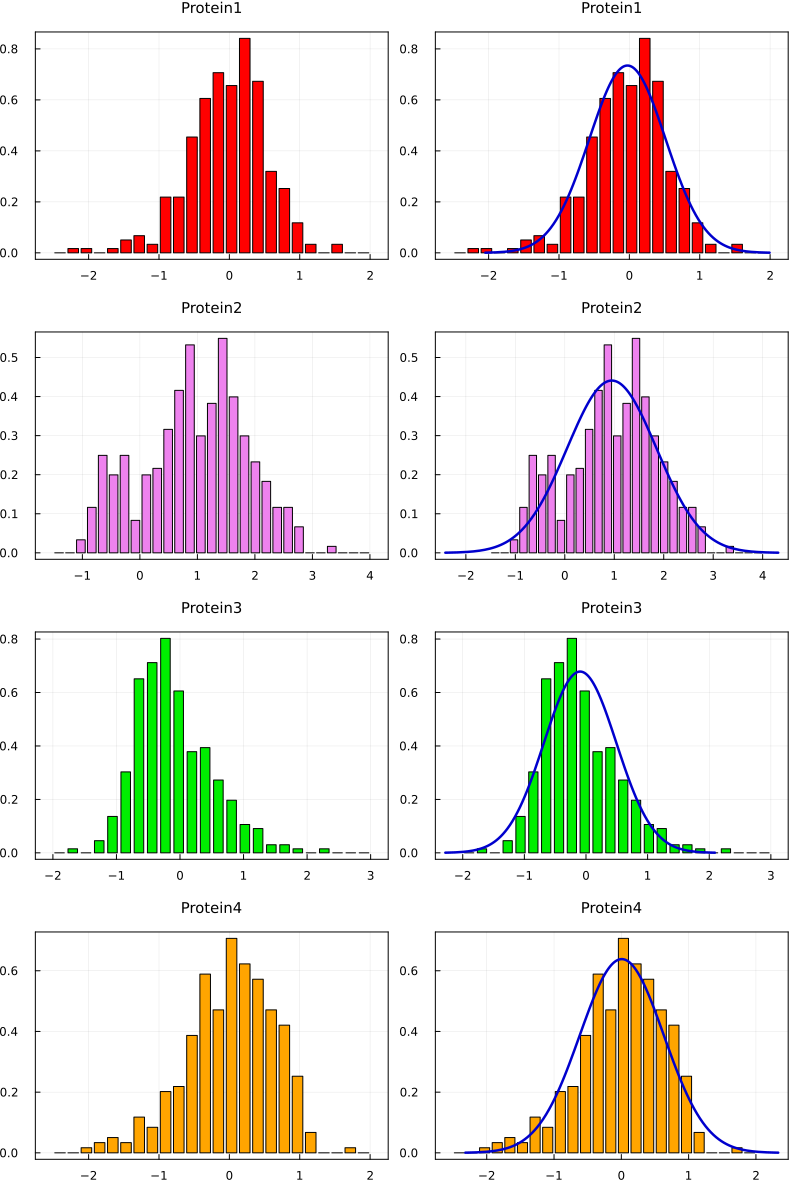

In [16]:
p17 = histogram(brca[:,:Protein1], legend = false, bar_width = 0.15, color = :red, framestyle = :box,
    title = "Protein1", titlefontsize = 10, bins = range(-2.5,2, length = 25), normalize = true)
p18 = plot(p17)
p18 = plot!(d1, linecolor = :blue3, linewidth = 2.5)

p19 = histogram(brca[:,:Protein2], legend = false, bar_width = 0.15, color = :violet, framestyle = :box,
    title = "Protein2", titlefontsize = 10, bins = range(-1.5,4, length = 30), normalize = true)
p20 = plot(p19)
p20 = plot!(d2, linecolor = :blue3, linewidth = 2.5)

p21 = histogram(brca[:,:Protein3], legend = false, bar_width = 0.15, color = :green2, framestyle = :box,
    title = "Protein3", titlefontsize = 10, bins = range(-2,3, length = 25), normalize = true)
p22 = plot(p21)
p22 = plot!(d3, linecolor = :blue3, linewidth = 2.5)

p23 = histogram(brca[:,:Protein4], legend = false, bar_width = 0.15, color = :orange, framestyle = :box,
    title = "Protein4", titlefontsize = 10, bins = range(-2.5,2, length = 25), normalize = true)
p24 = plot(p23)

p24 = plot!(d4, linecolor = :blue3, linewidth = 2.5)
plot!(p17, p18, p19, p20, p21, p22, p23, p24, layout=(4,2), size = (800,1200))

In [17]:
using PyCall
np = pyimport("numpy");
plt = pyimport("matplotlib.pyplot");

In [18]:
df = brca[:, [1,3,4,5,6]];

In [19]:
function pairplot(df)
    l = []
    for i in range(start = 1, step  =1, stop = length(names(df)))
        for j in range(start = 1, step  =1, stop = length(names(df)))
            if i == j
                if j == 1
                    push!(l,histogram(df[:,i], ylabel = names(df)[i], normalize = true, labelfontsize = 10))
                elseif i == length(names(df))
                    push!(l,histogram(df[:,i], xlabel = names(df)[j], normalize = true, labelfontsize = 10))
                else
                    push!(l,histogram(df[:,i], normalize = true))
                end
            else
                if j == 1
                    push!(l,scatter([df[:,j]], [df[:,i]], ylabel = names(df)[i],
                            markersize = 3, markerstrokewidth = 0.1, labelfontsize = 10))
                elseif i == length(names(df))
                    push!(l,scatter([df[:,j]], [df[:,i]], xlabel = names(df)[j],
                            markersize = 3, markerstrokewidth = 0.1, labelfontsize = 10))
                else
                    push!(l,scatter([df[:,j]], [df[:,i]], markersize = 3, markerstrokewidth = 0.1, labelfontsize = 10))
                end
            end
        end
    end
    return plot!(l[1],l[2],l[3],l[4],l[5],l[6],l[7],l[8],l[9],l[10],l[11],l[12],l[13],l[14],l[15],
    l[16],l[17],l[18],l[19],l[20],l[21],l[22],l[23],l[24],l[25],layout=(5,5), size = (850,850), legend = false, c = :auto)
end

pairplot (generic function with 1 method)

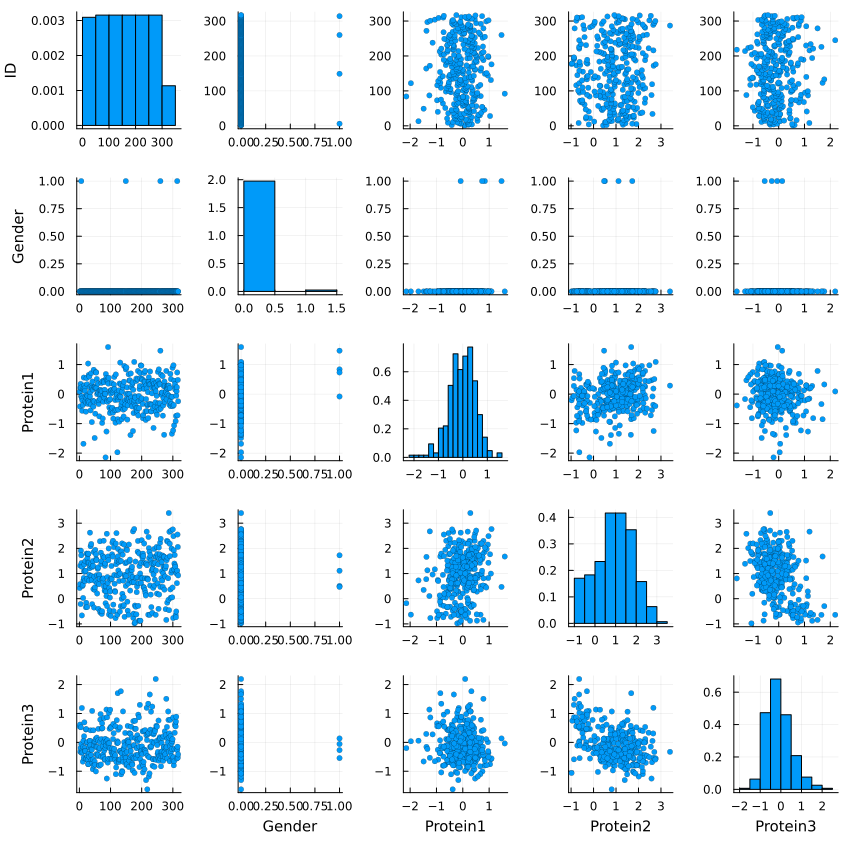

In [20]:
pairplot(df)

## Data cleaning for model building

In [21]:
first(brca,5)

,ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology
,Int64,Int64,Int64,Float64,Float64,Float64,Float64,String3,String31
1,1,36,0,0.080353,0.42638,0.54715,0.27368,III,Infiltrating Ductal Carcinoma
2,2,43,0,-0.42032,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma
3,3,69,0,0.21398,1.3114,-0.32747,-0.23426,III,Infiltrating Ductal Carcinoma
4,4,56,0,0.34509,-0.21147,-0.19304,0.12427,II,Infiltrating Ductal Carcinoma
5,5,56,0,0.22155,1.9068,0.52045,-0.31199,II,Infiltrating Ductal Carcinoma


In [22]:
brca = select(brca, Not(:ER_status));
brca = select(brca, Not(:PR_status));
first(brca,5)

,ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology
,Int64,Int64,Int64,Float64,Float64,Float64,Float64,String3,String31
1,1,36,0,0.080353,0.42638,0.54715,0.27368,III,Infiltrating Ductal Carcinoma
2,2,43,0,-0.42032,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma
3,3,69,0,0.21398,1.3114,-0.32747,-0.23426,III,Infiltrating Ductal Carcinoma
4,4,56,0,0.34509,-0.21147,-0.19304,0.12427,II,Infiltrating Ductal Carcinoma
5,5,56,0,0.22155,1.9068,0.52045,-0.31199,II,Infiltrating Ductal Carcinoma


In [23]:
ohe_tumour = select(DataFrame(Tumour_Stage= brca[!, :Tumour_Stage]),
    [:Tumour_Stage => ByRow(isequal(v)) => Symbol(v)
        for v in unique(DataFrame(Tumour_Stage= brca[!, :Tumour_Stage]).Tumour_Stage)]);
ohe_tumour.I = map(x -> Int(x), ohe_tumour.I);
ohe_tumour.II = map(x -> Int(x), ohe_tumour.II);
ohe_tumour.III = map(x -> Int(x), ohe_tumour.III);

ohe_histology = select(DataFrame(Histology= brca[!, :Histology]),
    [:Histology => ByRow(isequal(v)) => Symbol(v)
        for v in unique(DataFrame(Histology= brca[!, :Histology]).Histology)]);
ohe_histology[!,"Infiltrating Ductal Carcinoma"] = map(x -> Int(x), ohe_histology[!,"Infiltrating Ductal Carcinoma"]);
ohe_histology[!,"Infiltrating Lobular Carcinoma"] = map(x -> Int(x), ohe_histology[!,"Infiltrating Lobular Carcinoma"]);
ohe_histology[!,"Mucinous Carcinoma"] = map(x -> Int(x), ohe_histology[!,"Mucinous Carcinoma"]);

In [24]:
ohe_surgery = select(DataFrame(Surgery_type= brca[!, :Surgery_type]),
    [:Surgery_type => ByRow(isequal(v)) => Symbol(v)
        for v in unique(DataFrame(Surgery_type= brca[!, :Surgery_type]).Surgery_type)]);
ohe_surgery[!,"Modified Radical Mastectomy"] = map(x -> Int(x), ohe_surgery[!,"Modified Radical Mastectomy"]);
ohe_surgery[!,"Lumpectomy"] = map(x -> Int(x), ohe_surgery[!,"Lumpectomy"]);
ohe_surgery[!,"Simple Mastectomy"] = map(x -> Int(x), ohe_surgery[!,"Simple Mastectomy"]);
ohe_surgery[!,"Other"] = map(x -> Int(x), ohe_surgery[!,"Other"]);

In [25]:
first(ohe_tumour,5)

,III,II,I
,Int64,Int64,Int64
1,1,0,0
2,0,1,0
3,1,0,0
4,0,1,0
5,0,1,0


In [26]:
first(ohe_histology,5)

,Infiltrating Ductal Carcinoma,Mucinous Carcinoma,Infiltrating Lobular Carcinoma
,Int64,Int64,Int64
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0
5,1,0,0


In [27]:
first(ohe_surgery,5)

,Modified Radical Mastectomy,Lumpectomy,Other,Simple Mastectomy
,Int64,Int64,Int64,Int64
1,1,0,0,0
2,0,1,0,0
3,0,0,1,0
4,1,0,0,0
5,0,0,1,0


In [28]:
ohe_tumour = insertcols!(ohe_tumour, 1, :ID => 1:317);
ohe_histology = insertcols!(ohe_histology, 1, :ID => 1:317);
ohe_surgery = insertcols!(ohe_surgery, 1, :ID => 1:317);

In [29]:
brca = leftjoin(brca, ohe_tumour, on = :ID);
brca = leftjoin(brca, ohe_histology, on = :ID);
brca = leftjoin(brca, ohe_surgery, on = :ID);

In [30]:
# brca = select(brca, Not(:Tumour_Stage));
# brca = select(brca, Not(:Histology));

In [31]:
brca = select(brca, Not(:ID));

In [32]:
describe(brca)

,variable,mean,min,median
,Symbol,Union…,Any,Union…
1,Age,58.7256,29,58.0
2,Gender,0.0126183,0,0.0
3,Protein1,-0.0272321,-2.1446,0.0056486
4,Protein2,0.949557,-0.97873,0.99713
5,Protein3,-0.095104,-1.6274,-0.19304
6,Protein4,0.00671301,-2.0255,0.038522
7,Tumour_Stage,,I,
8,Histology,,Infiltrating Ductal Carcinoma,
9,HER2_status,0.0914826,0,0.0


In [33]:
unique(brca[:,[:Surgery_type]])

,Surgery_type
,String31
1,Modified Radical Mastectomy
2,Lumpectomy
3,Other
4,Simple Mastectomy


In [34]:
unique(brca[:,[:Tumour_Stage]])

,Tumour_Stage
,String3
1,III
2,II
3,I


## Model building

### K- means Algorithm

In [35]:
using VMLS, LinearAlgebra, Statistics

In [36]:
using ScikitLearn.CrossValidation: train_test_split

In [37]:
function kmeans1(x, y, k; maxiters = 100, tol = 1e-5)
    N = length(x)
    n = length(x[1])
    distances = zeros(N)
    reps = [zeros(n) for j=1:k]
    assignment = y
    Jprevious = Inf
    
    for iter = 1:maxiters

# Grouping the same class together and choosing the mean the representative
        for j = 1:k
            group = [i for i=1:N if assignment[i] == j]
            reps[j] = sum(x[group]) / length(group);
        end;

#find distance to the nearest representative and its group index
# findmin returns the value, index of the min
         for i = 1:N
             (distances[i], assignment[i]) =
             findmin([norm(x[i] - reps[j]) for j = 1:k])
         end;

# Compute clustering objective.
        J = norm(distances)^2 / N
        println("Iteration ", iter, ": Jclust = ", J, ".")
        if iter > 1 && abs(J - Jprevious) < tol * J
            return assignment, reps
        end
    Jprevious = J
    end

end

kmeans1 (generic function with 1 method)

In [38]:
function kmeans2(x,k)
    N = length(x)
    test_assignment = zeros(Int64, N)
    for i in 1:N
         test_assignment[i] = findmin([norm(x[i] - representatives[j]) for j = 1:k])[2]
     end;
    return test_assignment
end

kmeans2 (generic function with 1 method)

In [39]:
function cat_code3(x)
    if x == "Modified Radical Mastectomy"
        return 1
    elseif x == "Lumpectomy"
        return 2
    elseif x == "Simple Mastectomy"
        return 3
    else
        return 4
    end
end

cat_code3 (generic function with 1 method)

In [40]:
function cat_code4(x)
    if x == "I"
        return 1
    elseif x == "II"
        return 2
    else
        return 3
    end
end

cat_code4 (generic function with 1 method)

In [41]:
function cat_code5(x)
    if x == "Setosa"
        return 1
    elseif x == "Virginica"
        return 2
    else
        return 3
    end
end

cat_code5 (generic function with 1 method)

### Visualization by drawing samples

In [42]:
X = vcat( [ 0.3*randn(2) for i = 1:100 ], [ [0.75,0.75] + 0.3*randn(2) for i = 1:100 ],
    [ [0.75,-0.75] + 0.3*randn(2) for i = 1:100 ] );
y = vcat([1 for i = 1:100], [2 for i = 1:100], [3 for i = 1:100]);

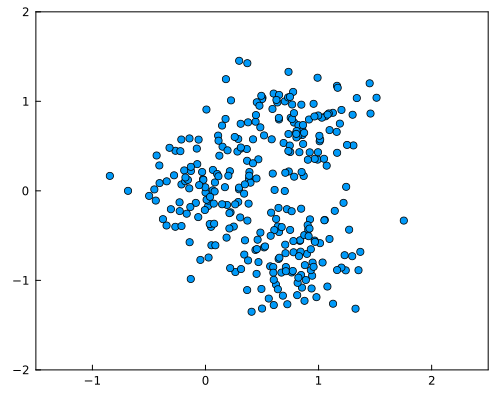

In [43]:
scatter([x[1] for x in X], [x[2] for x in X])
plot!(legend = false, grid = false, size = (500,400), xlims = (-1.5,2.5), ylims = (-2,2), framestyle = :box)

In [44]:
assignment1, representatives1= kmeans1(X, vcat([1 for i = 1:100], [2 for i = 1:100], [3 for i = 1:100]), 3);

Iteration 1: Jclust = 0.17677562958086887.
Iteration 2: Jclust = 0.1766610632661284.
Iteration 3: Jclust = 0.176641340960959.
Iteration 4: Jclust = 0.176641340960959.


In [45]:
a = [y[i] == assignment1[i] for i in 1:300];
accuracy = sum(a)/300
print("Accuracy: $accuracy")

Accuracy: 0.9466666666666667

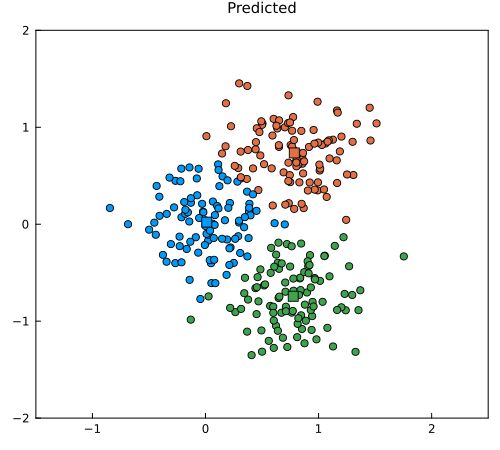

In [46]:
scatter([x[1] for x in X], [x[2] for x in X], c = assignment1)
scatter!([x[1] for x in representatives1], [x[2] for x in representatives1], markershape = :rect, c = [1,2,3],
        title = "Predicted", titlefontsize = 10, markersize = 5)
plot!(legend = false, grid = false, size = (500,450), xlims = (-1.5,2.5), ylims = (-2,2), framestyle = :box)

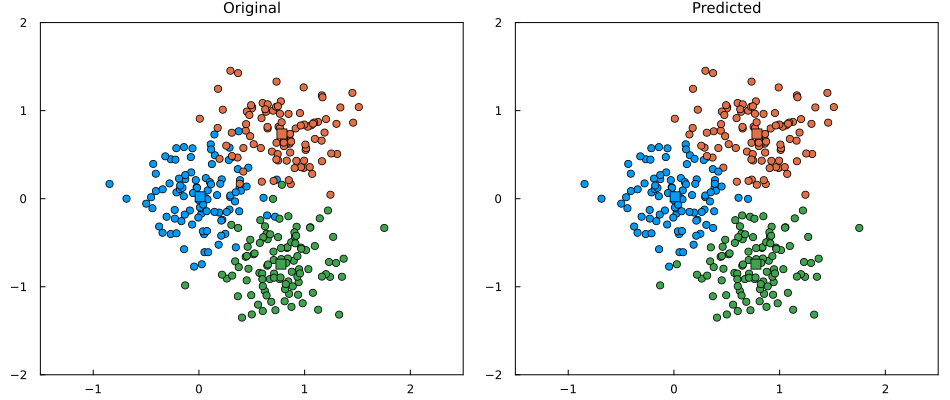

In [47]:
p1 = scatter([x[1] for x in X], [x[2] for x in X], c = y)
p1 = scatter!([x[1] for x in representatives1], [x[2] for x in representatives1], markershape = :rect, c = [1,2,3],
            title = "Original", titlefontsize = 10, markersize = 5)
p2 = scatter([x[1] for x in X], [x[2] for x in X], c = assignment1)
p2 = scatter!([x[1] for x in representatives1], [x[2] for x in representatives1], markershape = :rect, c = [1,2,3],
            title = "Predicted", titlefontsize = 10, markersize = 5)
plot!(p1, p2, legend = false, grid = false, size = (950,400), xlims = (-1.5,2.5), ylims = (-2,2),
    framestyle = :box, layout= (1,2))

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25);

In [49]:
assignment, representatives= kmeans1(X_train, y_train, 3);

Iteration 1: Jclust = 0.17950780675651254.
Iteration 2: Jclust = 0.1793503082324937.
Iteration 3: Jclust = 0.1793503082324937.


In [50]:
a = [assignment[i] == y_train[i] for i in 1:225];
accuracy = sum(a)/225
print("Training Accuracy: $accuracy")

Training Accuracy: 1.0

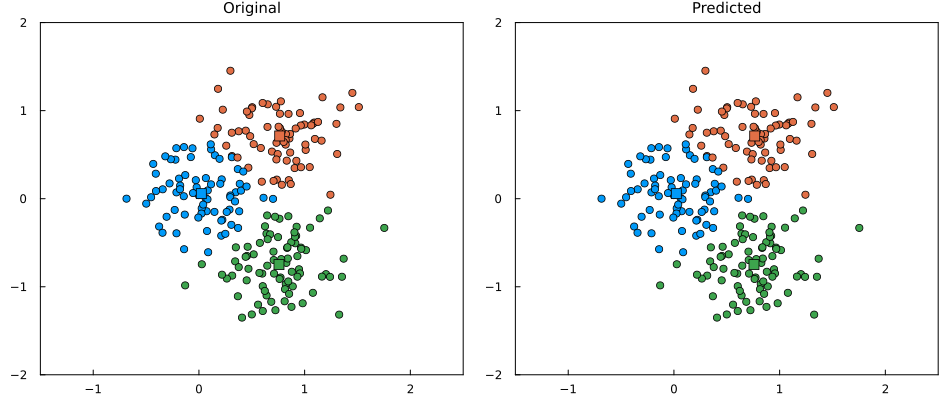

In [51]:
p3 = scatter([x[1] for x in X_train], [x[2] for x in X_train], c = y_train)
p3 = scatter!([x[1] for x in representatives], [x[2] for x in representatives], markershape = :rect, c = [1,2,3],
            title = "Original", titlefontsize = 10, markersize = 5)
p4 = scatter([x[1] for x in X_train], [x[2] for x in X_train], c = assignment)
p4 = scatter!([x[1] for x in representatives], [x[2] for x in representatives], markershape = :rect, c = [1,2,3],
            title = "Predicted", titlefontsize = 10, markersize = 5)
plot!(p3, p4, legend = false, grid = false, size = (950,400), xlims = (-1.5,2.5), ylims = (-2,2),
    framestyle = :box, layout= (1,2))

In [52]:
pred = kmeans2(X_test, 3);

In [53]:
a = [pred[i] == y_test[i] for i in 1:75];
accuracy = sum(a)/75
print("Testing Accuracy: $accuracy")

Testing Accuracy: 0.9733333333333334

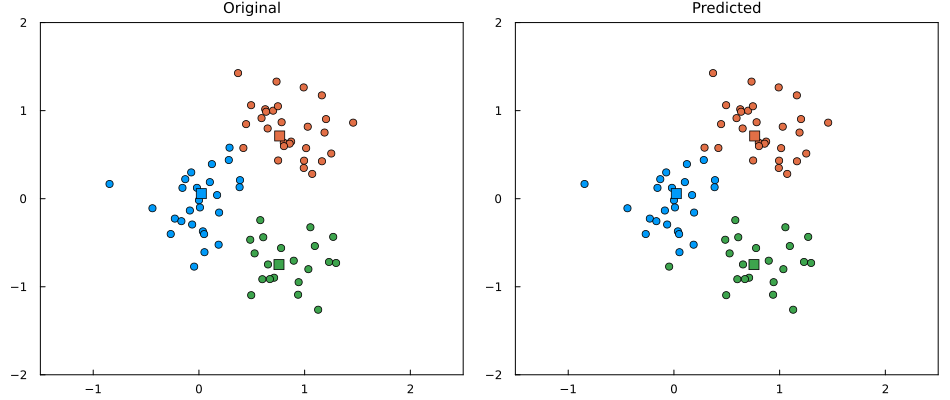

In [54]:
p5 = scatter([x[1] for x in X_test], [x[2] for x in X_test], c = y_test)
p5 = scatter!([x[1] for x in representatives], [x[2] for x in representatives], markershape = :rect, c = [1,2,3],
            title = "Original", titlefontsize = 10, markersize = 5)
p6 = scatter([x[1] for x in X_test], [x[2] for x in X_test], c = pred)
p6 = scatter!([x[1] for x in representatives], [x[2] for x in representatives], markershape = :rect, c = [1,2,3],
            title = "Predicted", titlefontsize = 10, markersize = 5)
plot!(p5, p6, legend = false, grid = false, size = (950,400), xlims = (-1.5,2.5), ylims = (-2,2),
    framestyle = :box, layout= (1,2))

### Demonstration on Iris Dataset

In [55]:
iris = CSV.read("iris.csv", DataFrame, normalizenames= true);
first(iris,5)

,sepal_length,sepal_width,petal_length,petal_width,variety
,Float64,Float64,Float64,Float64,String15
1,5.1,3.5,1.4,0.2,Setosa
2,4.9,3.0,1.4,0.2,Setosa
3,4.7,3.2,1.3,0.2,Setosa
4,4.6,3.1,1.5,0.2,Setosa
5,5.0,3.6,1.4,0.2,Setosa


In [56]:
unique(iris.variety)

3-element Vector{String15}:
 "Setosa"
 "Versicolor"
 "Virginica"

In [57]:
x = Array(iris[!, ["sepal_length", "sepal_width", "petal_length", "petal_width"]]);

In [58]:
X = []
m, n = size(x)
for i in 1:m
    vec = [x[i,j] for j in 1:n]
    push!(X,vec)
end

In [59]:
y = Array(iris[!, [:variety]]);
y = map(x -> cat_code5(x), y);

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25);

In [61]:
assignment, representatives = kmeans1(X_train, y_train, 3);

Iteration 1: Jclust = 0.5344739654138518.
Iteration 2: Jclust = 0.5263362487545031.
Iteration 3: Jclust = 0.5250704731173481.
Iteration 4: Jclust = 0.5232504359881143.
Iteration 5: Jclust = 0.5219633860526848.
Iteration 6: Jclust = 0.5219633860526848.


In [62]:
a = [assignment[i] == y_train[i] for i in 1:112];
accuracy = sum(a)/112
print("Training Accuracy: $accuracy")

Training Accuracy: 1.0

In [63]:
pred = kmeans2(X_test,3);

In [64]:
a = [pred[i] == y_test[i] for i in 1:38];
accuracy = sum(a)/38
print("Testing Accuracy: $accuracy")

Testing Accuracy: 0.9210526315789473

### Predicting Surgery Required

In [65]:
x = Array(brca[!, ["Age", "Gender", "Protein1", "Protein2", "Protein3", "Protein4",
            "Infiltrating Ductal Carcinoma", "Mucinous Carcinoma", "Infiltrating Lobular Carcinoma", "I",
            "II", "III", "HER2_status"]]);

In [66]:
X = []
m, n = size(x)
for i in 1:m
    vec = [x[i,j] for j in 1:n]
    push!(X,vec)
end

In [67]:
y = Array(brca[!, [:Surgery_type]]);
y = map(x -> cat_code3(x), y);

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25);

In [69]:
assignment, representatives = kmeans1(X_train, y_train, 4);

Iteration 1: Jclust = 133.7496271612162.
Iteration 2: Jclust = 37.71543851838112.
Iteration 3: Jclust = 24.49511259972461.
Iteration 4: Jclust = 20.353200493931528.
Iteration 5: Jclust = 19.48325026447773.
Iteration 6: Jclust = 19.009405986131476.
Iteration 7: Jclust = 18.940366614642905.
Iteration 8: Jclust = 18.869853338285836.
Iteration 9: Jclust = 18.869853338285836.


In [70]:
a = [np.ravel(y_train)[i] == np.ravel(assignment)[i] for i in 1:237];
accuracy = sum(a)/237
print("Training Accuracy: $accuracy")

Training Accuracy: 1.0

In [71]:
pred = kmeans2(X_test,4);

In [72]:
a = [pred[i] == y_test[i] for i in 1:80];
accuracy = sum(a)/80
print("Testing Accuracy: $accuracy")

Testing Accuracy: 0.225

### Predicting Tumour Stage

In [73]:
x = Array(brca[!, ["Age", "Gender", "Protein1", "Protein2", "Protein3", "Protein4",
            "Infiltrating Ductal Carcinoma", "Mucinous Carcinoma", "Infiltrating Lobular Carcinoma", "HER2_status",
            "Modified Radical Mastectomy", "Lumpectomy", "Other", "Simple Mastectomy"]]);

In [74]:
X = []
m, n = size(x)
for i in 1:m
    vec = [x[i,j] for j in 1:n]
    push!(X,vec)
end

In [75]:
y = Array(brca[!, [:Tumour_Stage]]);
y = map(x -> cat_code4(x), y);

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25);

In [77]:
assignment, representatives = kmeans1(X_train, y_train, 3);

Iteration 1: Jclust = 115.97963089343261.
Iteration 2: Jclust = 36.123804935108744.
Iteration 3: Jclust = 28.1574464730263.
Iteration 4: Jclust = 27.364224501746655.
Iteration 5: Jclust = 27.364224501746655.


In [78]:
a = [np.ravel(y_train)[i] == np.ravel(assignment)[i] for i in 1:237];
accuracy = sum(a)/237
print("Training Accuracy: $accuracy")

Training Accuracy: 1.0

In [79]:
pred = kmeans2(X_test,3);

In [80]:
a = [pred[i] == y_test[i] for i in 1:80];
accuracy = sum(a)/80
print("Testing Accuracy: $accuracy")

Testing Accuracy: 0.375